# K-Nearest Neighbors (KNN) Classification - Iris Dataset
- **Dataset**: [Iris Species](https://www.kaggle.com/datasets/uciml/iris)
- **Tools**: Scikit-learn, Pandas, Matplotlib, Seaborn
- **Objective**: Implement and visualize KNN for classification

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [2]:
# 2. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target classes:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# 3. Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 4. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

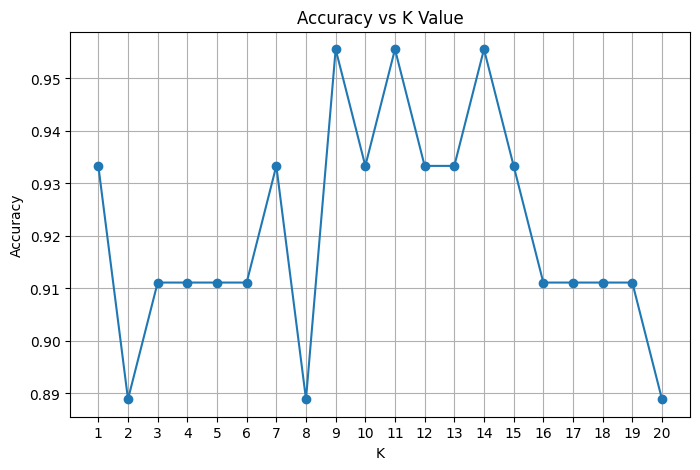

In [5]:
# 5. Train and Evaluate KNN for Different K Values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Best K: 9


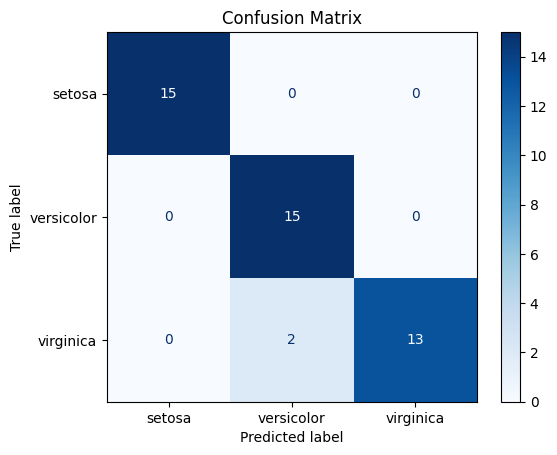

In [6]:
# 6. Choose best K and Display Confusion Matrix
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

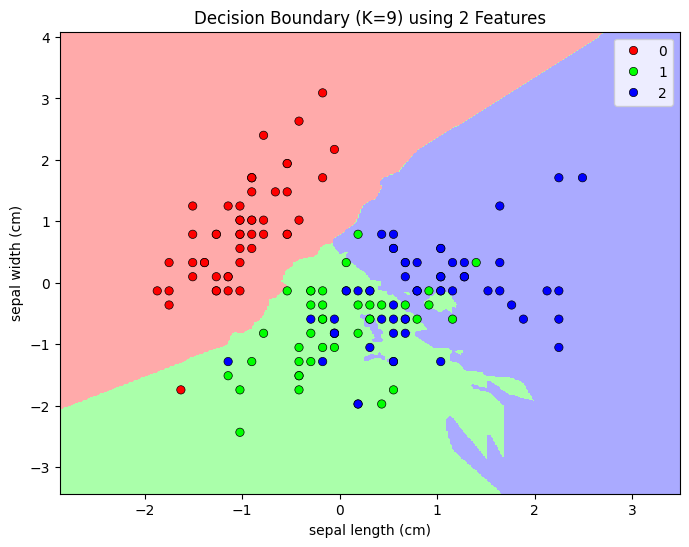

In [8]:
# 7. Visualize Decision Boundaries with first two features
X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_v, y_train_v)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette=['#FF0000', '#00FF00', '#0000FF'], edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Decision Boundary (K={best_k}) using 2 Features")
plt.legend()
plt.show()